In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## When there is Normal Distribution use Z-Score

In [2]:
data = pd.read_csv("scholarship.csv")

In [21]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,69.612400,32.225000,0.489000,9.876544e-16
std,6.158979,19.130822,0.500129,1.000000e+00
min,48.900000,0.000000,0.000000,-3.362960e+00
25%,65.500000,17.000000,0.000000,-6.677081e-01
50%,69.600000,28.000000,0.000000,-2.013321e-03
75%,73.700000,44.000000,1.000000,6.636815e-01
max,91.200000,100.000000,1.000000,3.505062e+00


In [4]:
data.head(5)

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


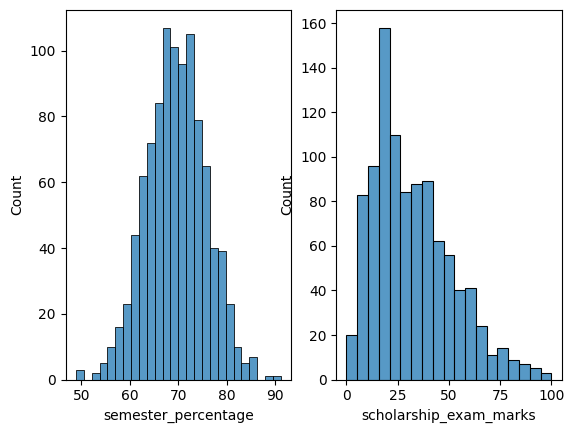

In [6]:
plt.subplot(1,2,1)
sns.histplot(data["semester_percentage"])
plt.subplot(1,2,2)
sns.histplot(data["scholarship_exam_marks"])
plt.show()

## Finding the Mean, STD, Max & Min

In [7]:
print("Mean = ", data["semester_percentage"].mean())
print("Std = " ,data["semester_percentage"].std())
print("Max = " ,data["semester_percentage"].max())
print("Min = " ,data["semester_percentage"].min())

Mean =  69.6124
Std =  6.158978751323897
Max =  91.2
Min =  48.9


## Finding the range Mean + 3 STD & Mean - 3 STD

In [8]:
print("Highest allowed = ", data["semester_percentage"].mean()+ 3* data["semester_percentage"].std() )
print("Lowest allowed = ", data["semester_percentage"].mean()- 3* data["semester_percentage"].std() )

Highest allowed =  88.08933625397168
Lowest allowed =  51.13546374602831


## Finding the Outliers

In [ ]:
data[(data["semester_percentage"]<51.13) | (data["semester_percentage"]>88.08) ] # This code filters rows from the DataFrame data based on a condition applied to the column "semester_percentage".


,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## Trimming the Data

In [ ]:
data[(data["semester_percentage"]>51.13) & (data["semester_percentage"]<88.08) ] # This code filters rows from the DataFrame data based on a condition applied to the column "semester_percentage".



,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## Trimming using Z-Score

In [ ]:
data["z_score"] = (data["semester_percentage"]-data["semester_percentage"].mean())/data["semester_percentage"].std() # This code calculates the z-score of the column "semester_percentage" and stores it in a new column "z_score".


## Finding the Outliers

In [18]:
data[(data["z_score"]<-3) | (data["z_score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


## Trimming the Outliers

In [ ]:
data[(data["z_score"]>-3) & (data["z_score"]<3)] # This code filters rows from the DataFrame data based on a condition applied to the column "z_score".


,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## Capping the Data (Instead of Trimming)

In [19]:
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()

In [ ]:
data['semester_percentage'] = np.where(data['semester_percentage']>upper_limit, upper_limit, data['semester_percentage']) # This code replaces the values in the column "semester_percentage" that are greater than the upper limit with the upper limit.   

data['semester_percentage'] = np.where(data['semester_percentage']<lower_limit, lower_limit, data['semester_percentage']) # This code replaces the values in the column "semester_percentage" that are less than the lower limit with the lower limit.


In [20]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239
